Mean Squared Error: 0.6858914262701505
R² Score: 0.3416710804903712


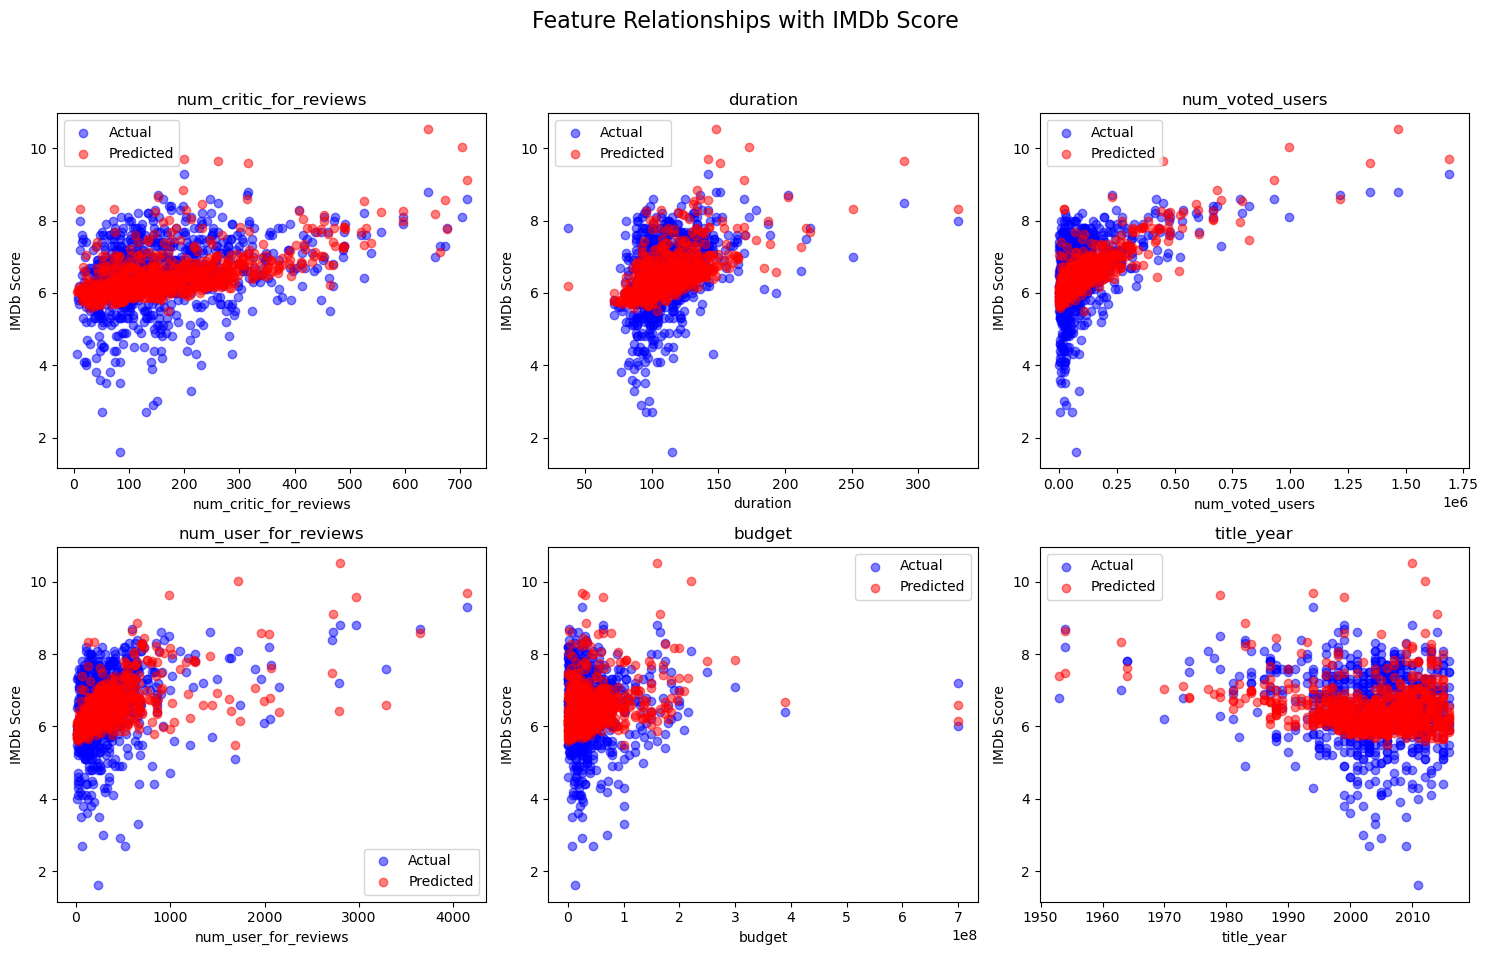

In [22]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_excel("/Users/mohammedabbas/Downloads/New Microsoft Excel Worksheet.xlsx")  

# Selecting features and target variable
features = ['num_critic_for_reviews', 'duration', 'num_voted_users', 'num_user_for_reviews', 'budget', 'title_year']
X = df[features]
y = df['imdb_score']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predictions
y_pred = linear_model.predict(X_test)

# Metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

# Visualization of feature relationships with IMDb score
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
fig.suptitle('Feature Relationships with IMDb Score', fontsize=16)

for i, feature in enumerate(features):
    # Plot setup
    ax = axes.flatten()[i]
    ax.scatter(X_test[feature], y_test, color='blue', alpha=0.5, label='Actual')
    ax.scatter(X_test[feature], y_pred, color='red', alpha=0.5, label='Predicted')
    ax.set_title(feature)
    ax.set_xlabel(feature)
    ax.set_ylabel('IMDb Score')
    ax.legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
